In [158]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from importlib import reload

import clothes
reload(clothes)
from clothes import *

import colorsys


%matplotlib inline

img_url = 'http://ak1.polyvoreimg.com/cgi/img-set/cid/208720280/id/fpb3q_mE5hGwWjrEZFZllw/size/y.jpg'
#https://images.techhive.com/images/article/2016/11/1024px-red_hat_with_bow2-100691530-large.jpg'

response = requests.get(img_url)
imgobj = Image.open(BytesIO(response.content))



In [159]:
img_data = np.array(imgobj)

xdim, ydim = np.shape(img_data)[0], np.shape(img_data)[1]


In [143]:
downsampled_img=clothes.downsample(img_data, percent=50, max_length=250)

In [152]:
import time
t0=time.time()
bg_subtracted_img = clothes.bg_subtract(downsampled_img, plot=False, flipRGB=False, include_rect=[.05,.05,1.6,1.2])
print(time.time()-t0)

0.5225276947021484


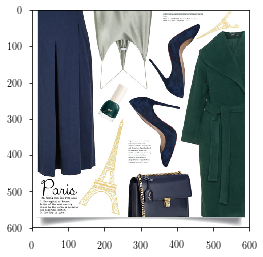

In [160]:
fig,ax = plt.subplots(1)

ax.imshow( img_data)


In [161]:
centroids=clt.cluster_centers_
HSLcolors=[ colorsys.rgb_to_hls(list(rgb)[0]/255., list(rgb)[1]/255., list(rgb)[2]/255.) for i,rgb in enumerate(centroids)]
#colorsys.rgb_to_hls(centroids[0])
for i,hsl in enumerate(HSLcolors):
    print(centroids[i], dist_from_mean(centroids[i]))

[ 239.1899818   210.59413465  199.66192158] 28.8658004232
[ 129.62113402   92.33473596   68.42830844] 43.613280318
[ 170.38717362  123.08218982  106.63755479] 46.8052753955
[ 228.29577509  174.96577446  182.5782298 ] 40.7926970196
[ 85.13071485  60.7076198   38.9641791 ] 32.6629954098
[ 233.4944248   207.01992113  137.99401686] 69.7275715956
[ 203.40940394   60.29019235   86.51246735] 107.75838748
[ 153.49063415  168.0582439    83.23873171] 64.1401972228
[ 236.18323664  133.71829008  163.48207634] 74.5439623238
[ 196.93363177  160.76791655  138.05125467] 41.9965872318


In [163]:
color_indices = np.where(np.std(img_data,axis=2)>15.)
x_colors, y_colors = color_indices[0], color_indices[1]

colored_pixels=[img_data[x_colors[i]][y_colors[i]] for i in range(len(x_colors))]



In [156]:
#time_old=clt_time
print( time_old)
print(clt_time)

[0.2593955993652344, 0.6138222217559814, 0.62833571434021, 0.6747643947601318, 1.0092062950134277, 1.1435356140136719, 1.7997336387634277, 1.6590287685394287, 1.8471853733062744]
[0.6035251617431641, 0.7802009582519531, 1.3962748050689697, 1.9005846977233887, 4.043946027755737, 3.466512680053711, 4.530834436416626, 5.199012517929077, 5.970367670059204]


n clusters= 2
[ 0.83597072  0.16402928]
0.835970720152 [ 41.66194403  54.5376379   77.00452909]
0.164029279848 [ 220.3100142   202.15577652  159.92755682]


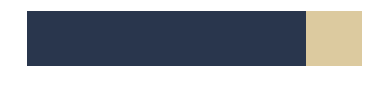

n clusters= 3
[ 0.8253694   0.04772538  0.12690523]
0.825369395958 [ 40.44931662  53.89625726  76.92634501]
0.0477253752209 [ 163.11350692  132.80105777  109.98047193]
0.126905228822 [ 234.78289474  220.07787638  172.29253366]


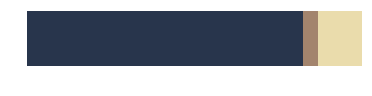

n clusters= 4
[ 0.12915752  0.12690523  0.04755063  0.69638662]
0.129157524804 [ 28.19083969  58.5765604   59.27944918]
0.126905228822 [ 234.78289474  220.07787638  172.29253366]
0.0475506281188 [ 163.279706    132.99877501  110.12780727]
0.696386618255 [ 42.75408098  53.03002483  80.21444317]


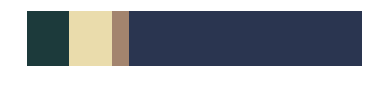

n clusters= 5
[ 0.69605654  0.05669573  0.04582257  0.12909928  0.07232588]
0.696056540396 [ 42.70001953  53.00661106  80.21677034]
0.0566957264625 [ 227.48600683  207.52764505  149.778157  ]
0.0458225734423 [ 161.44915254  130.76822034  108.37584746]
0.12909927577 [ 28.1873966   58.64340502  59.22063468]
0.0723258839291 [ 239.356393    228.56177658  189.07994616]


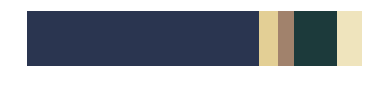

n clusters= 6
[ 0.05626857  0.69520222  0.03737646  0.12500243  0.01497     0.07118032]
0.0562685668796 [ 228.57172414  208.79862069  150.38724138]
0.69520222123 [ 42.21327041  52.77558714  80.2999246 ]
0.037376463507 [ 169.91229891  139.80020758  116.97197717]
0.125002427043 [ 28.06326753  59.3396549   58.98243432]
0.0149700017475 [ 123.78311688   92.94805195   73.01688312]
0.071180319593 [ 239.40938865  228.6779476   189.37036026]


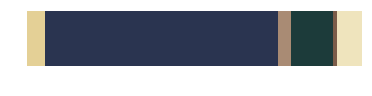

n clusters= 7
[ 0.25120867  0.07125798  0.03739588  0.46403122  0.0561909   0.01479525
  0.10512009]
0.251208667456 [ 36.84765806  47.96259082  75.48284124]
0.0712579849717 [ 239.39891008  228.6653951   189.33705722]
0.0373958798517 [ 169.87655602  139.76089212  116.92946058]
0.464031221482 [ 44.44349136  54.80836018  82.30043098]
0.0561909015009 [ 228.55233161  208.75854922  150.34887737]
0.0147952546454 [ 124.29644269   92.85770751   72.73649539]
0.105120090092 [ 28.43147396  63.17491688  57.67066864]


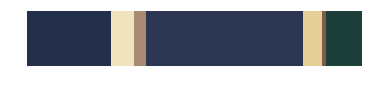

n clusters= 8
[ 0.51198959  0.05675398  0.02555191  0.10403277  0.06894744  0.02075607
  0.00966934  0.2022989 ]
0.511989592839 [ 44.036596    54.44430961  81.99924153]
0.0567539754966 [ 229.66187543  210.183436    151.3569473 ]
0.0255519095975 [ 154.35325265  122.7730711   100.09757943]
0.10403277479 [ 27.83093861  63.40063445  58.14722896]
0.068947439955 [ 239.61109547  228.9557871   189.97972402]
0.0207560724618 [ 181.27469426  153.45719661  129.48353716]
0.00966933965012 [ 103.81124498   71.14859438   53.97791165]
0.20229889521 [ 35.91592283  47.26778002  74.75909396]


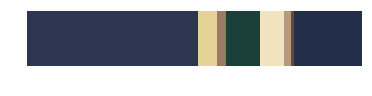

n clusters= 9
[ 0.00953343  0.0515504   0.46356523  0.02438693  0.10366386  0.0358814
  0.03892977  0.02147448  0.2510145 ]
0.00953342523736 [ 102.6395112    70.04684318   52.66191446]
0.0515503951226 [ 233.72224313  220.36206248  173.24275499]
0.46356522921 [ 44.4055288   54.83656545  82.35313089]
0.0243869289168 [ 153.17080994  121.52606255   98.84121893]
0.103663864241 [ 27.73473211  63.37542151  58.15586362]
0.0358814049667 [ 227.71320346  205.75        143.08225108]
0.0389297710813 [ 243.23165252  233.54318522  198.28357464]
0.0214744772149 [ 179.51523297  151.23924731  127.90143369]
0.251014504009 [ 36.81605817  47.9714573   75.50642017]


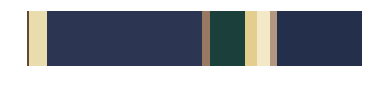

n clusters= 10
[ 0.507718    0.0515504   0.02495     0.06611265  0.03892977  0.02085315
  0.03578432  0.00955284  0.1992117   0.04533716]
0.50771799701 [ 43.94240698  53.97426288  81.96034265]
0.0515503951226 [ 233.71789077  220.36082863  173.23163842]
0.0249500029125 [ 154.00464037  122.38437742   99.69450889]
0.0661126536318 [ 23.69750367  58.60969163  53.93450808]
0.0389297710813 [ 243.22793017  233.53167082  198.27331671]
0.0208531541852 [ 180.27631579  152.18890977  128.73496241]
0.0357843232433 [ 227.78676072  205.82745524  143.05751492]
0.00955284158204 [ 103.84412955   71.1659919    54.03846154]
0.199211696406 [ 35.91423002  47.26793372  74.73040936]
0.0453371648253 [ 37.03169165  73.68950749  68.19657388]


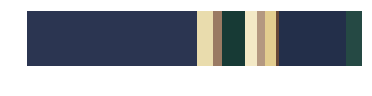

In [164]:
clt_time=[]
for n in [2,3,4,5,6,7,8,9,10]:

    t0=time.time()
    #clt = clothes.color_clusters(colored_pixels , NumColorCenters=8)       
    clt = KMeans(n_clusters = n)
    clt.fit(colored_pixels)
    clt_time.append(time.time()-t0 )

    print('n clusters=',n)
    rgb_colors=clothes.plot_colors(clt)
    

In [80]:
flattened_img_data = img_data.reshape(xdim*ydim, 3)

t0=time.time()
reduced_img_data = np.where(dist_from_mean(flattened_img_data)>15)
#[pixel for pixel in flattened_img_data if dist_from_mean(pixel)>15.]
print(time.time()-t0)

0.002705812454223633


9.563765048980713  s
aa
aa
aa
aa
aa
aa
aa
[ 0.59452778  0.13525556  0.030275    0.06786389  0.03457222  0.02481389
  0.11269167]
0.594527777778 [ 29.22698559  27.07719513  34.31967699]
0.135255555556 [ 198.64499909  155.07862498  100.243646  ]
0.030275 [ 216.93704977  201.97282253  188.89632449]
0.0678638888889 [ 150.94166868  147.66763215  143.86901601]
0.0345722222222 [ 142.28507496   27.44182144   29.70049228]
0.0248138888889 [ 7.22876317  6.75356779  6.9593527 ]
0.112691666667 [ 111.5175334    88.93821565   77.20879055]


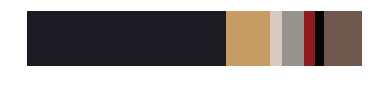

0.16007256507873535  s


In [15]:
t0=time.time()
clt = clothes.color_clusters(img_data , NumColorCenters=8)            # labels_, cluster_centers_, inertia_
print( time.time()-t0 ,' s')
                             
t0=time.time()
rgb_colors=clothes.plot_colors(clt)
print( time.time()-t0 ,' s')
    

In [128]:
for color in rgb_colors:
    print(distance_from_black(color))

273.320082002
113.480940405
337.563042044
221.753585663
70.9399024174
158.862560443


In [44]:
import colorgram

colors = colorgram.extract('http://ak2.polyvoreimg.com/cgi/img-set/cid/192203629/id/LAEbX-He5RGAYflzBrDUMQ/size/y.jpg', 6, use_url=True)
colors.sort(key=lambda c: c.hsl.h)
first_color = colors[0]
rgb = first_color.rgb # e.g. (255, 151, 210)
hsl = first_color.hsl # e.g. (230, 255, 203)
proportion  = first_color.proportion # e.g. 0.34

# RGB and HSL are named tuples, so values can be accessed as properties.
# These all work just as well:
red = rgb[0]
red = rgb.r
saturation = hsl[1]
saturation = hsl.s

centroids=[]
for color in colors:
    centroids.append([color.rgb.r, color.rgb.g, color.rgb.b])

aa
aa
aa
aa
aa
aa
[ 0.28757778  0.18238889  0.13319167  0.095325    0.09298889  0.20852778]
0.287577777778 [109 103  97]
0.182388888889 [34 31 28]
0.133191666667 [168 164 158]
0.095325 [218 203 147]
0.0929888888889 [238 237 217]
0.208527777778 [229 229 233]


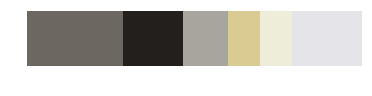

[array([109, 103,  97]),
 array([34, 31, 28]),
 array([168, 164, 158]),
 array([218, 203, 147]),
 array([238, 237, 217]),
 array([229, 229, 233])]

In [46]:
plot_colors(np.array(centroids))

In [39]:
def plot_colors(centroids, flip_RGB=False):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster

    # omits green bg
    unique_labels=np.unique(centroids)
    labels=[]
    RGBcolors=[]

    index_bg_color=None
    for i,centroid in enumerate(centroids):
        #if np.sqrt( centroid[0]**2 + (centroid[1]-255.)**2 + centroid[2]**2 )>5.5:#5.5:
        if np.sqrt( (centroid[0]-255.)**2 + (centroid[1]-255.)**2 + (centroid[2]-255.)**2)>6.:
            print('aa')
            labels.append(unique_labels[i])
            if flip_RGB==True:
                RGBcolors.append(centroid[::-1])
            else:
                RGBcolors.append(centroid)
        else:
            index_bg_color = i

    numLabels = np.arange(0, len(np.unique(labels)) +1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    #(hist, _) = np.histogram(labels, bins = numLabels)


    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
    print (hist)
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster

    for (percent, color) in zip(hist, RGBcolors):
        # plot the relative percentage of each cluster
        print(percent, color)
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)

        startX = endX

    # return the bar chart

    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()
    return RGBcolors


In [16]:
def dist_from_mean(rgb):
    r,g,b=rgb[0], rgb[1], rgb[2]
    mean=np.mean(rgb)
    return(np.sqrt((r-mean)**2+(g-mean)**2+(b-mean)**2 ))

In [86]:
dist_from_mean((244,244,122))

99.612582873182575